In [1]:
import earthkit.hydro as hydro
import numpy as np
import matplotlib.pyplot as plt

# River Network Creation

In [2]:
network = hydro.load_river_network(domain='efas', version='5')

caching in /etc/ecmwf/ssd/ssd1/tmpdirs/ecm7348.2423146.20241113_092130.110/tmp2wjofriq_earthkit_hydro


# Accuflux

In [3]:
# create or load a field of interest e.g. area, precipitation, discharge
# as an example, we provide a unit field over the domain
field = np.ones(network.mask.shape)

In [4]:
# conduct an accuflux
# this finds the amount of cells flowing into each point
accuflux_field = network.accuflux(field)

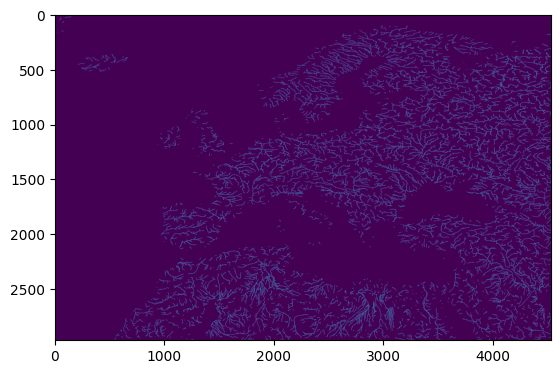

In [5]:
# visualise the results

# for example, to look at the rivers:
# create a field finding cells with more than e.g. 500 cells flowing into them
plt.imshow(accuflux_field>500)
plt.show()

# Subcatchments & Catchments

In [6]:
# create or load the points of interest
points = np.zeros(network.mask.shape)
points[1801, 4529] = 3 # largest catchment's sink is at (1801, 4529)
points[886, 3999] = 2 # point within largest catchment but not the sink
points[1621, 3298] = 1 # separate catchment

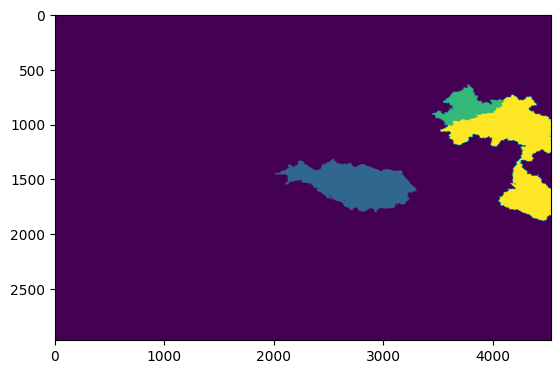

In [7]:
# find and plot the subcatchments
subcatchment_field = network.subcatchment(points)

plt.imshow(subcatchment_field)
plt.show()

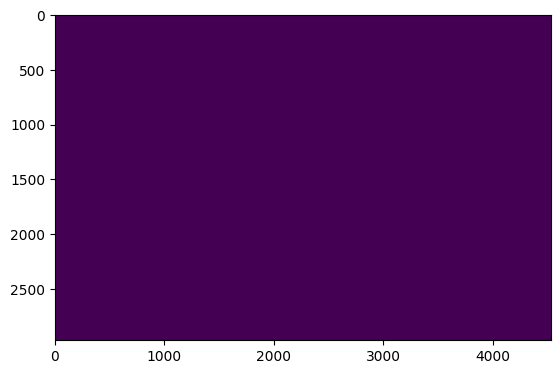

In [ ]:
# find and plot the catchments
# note: the subcatchment has been overwritten
catchment_field = network.catchment(points)

plt.imshow(catchment_field)
plt.show()

# Upstream & Downstream

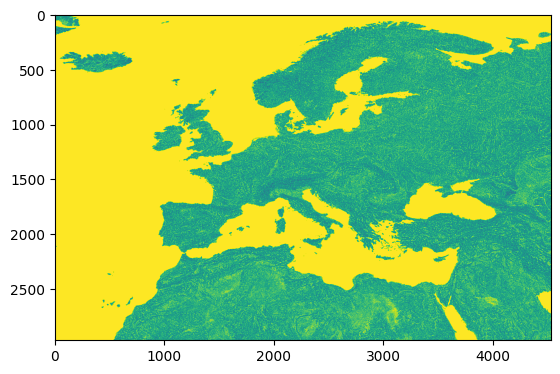

In [9]:
upstream_field = network.upstream(field)
plt.imshow(upstream_field>0) # show all cells with an upstream
plt.show()

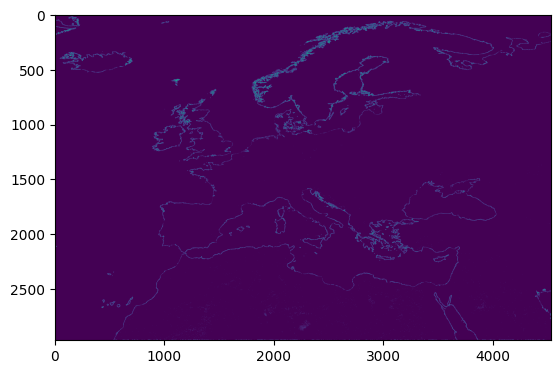

In [10]:
downstream_field = network.downstream(field)
plt.imshow(downstream_field==0) # show the sinks
plt.show()